# Derive Finite Difference Operators from Taylor Series

## Taylor series:

The approximation of $f(x)$ near the point $x_0$ is:

$$
\begin{align}
f(x) &\approx f(x_0) + \frac{f'(x)}{1!} (x - x_0) + \frac{f''(x)}{2!} (x - x_0)^2  + \frac{f'''(x)}{3!} (x - x_0)^3 + \dots \\
&\approx \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n
\end{align}
$$

The function values at $x \pm \triangle x$ are:
$$
f(x + \triangle x) = f(x) + \frac{\triangle x}{1!} f'(x) + \frac{\triangle x^2}{2!} f''(x) + \dots 
\tag{1}
$$
$$
f(x - \triangle x) = f(x) - \frac{\triangle x}{1!} f'(x) + \frac{\triangle x^2}{2!} f''(x) - \dots 
\tag{2}
$$

Rearange $(1)$ without $f''$ part for forward operator:
$$
f'(x) = \frac{f(x + \triangle x) - f(x)}{\triangle x} + \mathcal{O}(\triangle x)
$$

Rearange $(2)$ for backward operator:
$$
f'(x) = \frac{f(x) - f(x - \triangle x)}{\triangle x} + \mathcal{O}(\triangle x)
$$


With $\mathcal{O}(\triangle x)$ as order of error. 

Taking difference $(2)$ - $(1)$ to obtain central operator:
$$
f(x + \triangle x) - f(x - \triangle x) = f(x) + \frac{\triangle x}{1!} f'(x) - f(x) + \frac{\triangle x}{1!} f'(x) 
$$

$$
f'(x) = \frac{f(x + \triangle x) - f(x - \triangle x)}{2 \triangle x} + \mathcal{O}(\triangle x)
$$

Adding $(1)$ and $(2)$ including $f''$ parts for second derivative:

$$
f(x + \triangle x) + f(x - \triangle x) = 2 f(x) + 2 \frac{\triangle x^2}{2!} f''(x)
$$

$$
f''(x)  = \frac{ f(x + \triangle x) - 2 f(x) + f(x - \triangle x)}{\triangle x^2} + \mathcal{O}(\triangle x^2)
$$

<IPython.core.display.Javascript object>


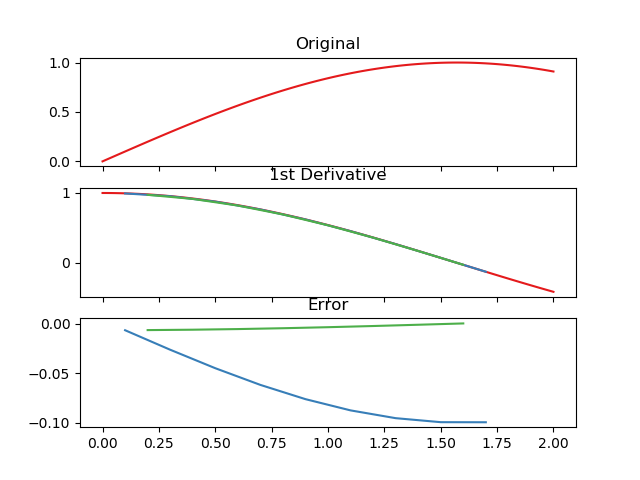

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

a = -3
b = 1
c = 1

def func(x):
    return np.sin(x) 
def func_dx(x):
    return np.cos(x)
def plot_tangent(m, n, x_start, x_end):
    _x = np.array([x_start, x_end])
    _y = m * _x + n
    plt.plot(_x, _y, ls="--", color="r", marker="o")

dx = .2
x_max = 2
x_analytical = np.linspace(0, x_max, 100)
x_discrete = np.arange(0, x_max, dx)

y = func(x_analytical)
dydx = func_dx(x_analytical)
y_discrete = func(x_discrete)

colors = sns.color_palette("Set1", 4)
c1, c2, c3, c4 = colors
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
plt.sca(ax1)
plt.title("Original")
plt.plot(x_analytical, y, color=c1)

plt.sca(ax2)
plt.title("1st Derivative")
plt.plot(x_analytical, dydx, color=c1)

ax3.set_title("Error")
#idx = 1
# analytical:
#y0 = y_i[idx]
#y_dx = func_dx(x_i[idx])
#y1 = y0 + y_dx * dx
#plt.plot([x_i[idx], x_i[idx+1]], [y0, y1], "--", color="r")

# forward:

forward = (y_discrete[1:] - y_discrete[:-1]) / dx
#y1 = y0 + y_dx * dx
#plt.plot([x_i[idx], x_i[idx+1]], [y0, y1], "--", color="r")
ax2.plot(x_discrete[:-1] + dx/2, forward, color=c2, label="forward")
ax3.plot(x_discrete[:-1] + dx/2, forward - func_dx(x_discrete[:-1]), color=c2, label="forward")

# centered
centered = (y_discrete[2:] - y_discrete[:-2]) /2 / dx
#y1 = y0 + y_dx * dx
ax2.plot(x_discrete[1:-1], centered, color=c3, label="centered")
ax3.plot(x_discrete[1:-1], centered - func_dx(x_discrete[1:-1]), color=c3, label="forward")
#y_backward = y_i[:3]
#for i in range(len(x_i)-4):    
#    y_dx = (y_backward[-1] - y_backward[-3]) /2 / dx
#    y_new = y_backward[-1] + 2*y_dx * dx
#    y_backward = np.hstack([y_backward, y_new])
#    print(y_new)
#    print(y_backward)
#plt.plot(x_i[:-1], y_backward);